In [1]:
# logging 
import logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)


In [2]:
# environment setup
import gym
# noinspection PyUnresolvedReferences
import gym_maze

maze = gym.make('Maze4-v0')
print("This is how maze looks like")
situation = maze.reset()
maze.render()

This is how maze looks like

■ ■ ■ ■ ■ ■ ■ ■
■ □ □ ■ A □ $ ■
■ ■ □ □ ■ □ □ ■
■ ■ □ ■ □ □ ■ ■
■ □ □ □ □ □ □ ■
■ ■ □ ■ □ □ □ ■
■ □ □ □ □ ■ □ ■
■ ■ ■ ■ ■ ■ ■ ■


In [4]:
from lcs.agents.xcs import XCS, Configuration


def xcs_maze_knowledge(population, environment) -> float:
    transitions = environment.env.get_all_possible_transitions()
    nr_correct = 0
    for start, action, end in transitions:
        perception = environment.env.maze.perception(*start)
        if any([True for cl in population
                if cl.does_match(perception) and
                cl.action == action and
                cl.wildcard_number() == 0
               ]):
            nr_correct += 1
    return nr_correct / len(transitions)

def xcs_maze_metrics(xcs: XCS, environment):
    return {
        'numerosity': xcs.population.numerosity(),
        'knowledge': xcs_maze_knowledge(xcs.population, environment),
        'population': len(xcs.population)
    }


cfg = Configuration(number_of_actions=4,
                    max_population=200,
                    metrics_trial_frequency=1,
                    user_metrics_collector_fcn=xcs_maze_metrics)

agent = XCS(cfg)
explore_population, explore_metrics = agent.explore(maze, 1000, False)

for cl in explore_population:
    print(str(cl))




INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 1.4451092936882999e-40, 'numerosity': 36, 'knowledge': 0.13043478260869565, 'population': 28}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 7, 'reward': 100.0001059583905, 'numerosity': 120, 'knowledge': 0.5130434782608696, 'population': 104}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 4, 'reward': 100.00000112319233, 'numerosity': 128, 'knowledge': 0.5043478260869565, 'population': 104}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 50, 'reward': 1.818231557629009e-51, 'numerosity': 136, 'knowledge': 0.5043478260869565, 'population': 104}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 5, 'reward': 100.0000720073871, 'numerosity': 136, 'knowledge': 0.5043478260869565, 'population': 104}
INFO:lcs.agents.Agent:{'trial': 500, 'steps_in_trial': 10, 'reward': 100.0, 'numerosity': 136, 'knowledge': 0.5043478260869565, 'population': 104}
INFO:lcs.agents.Agent:{'trial': 600, 'steps_in_trial':

Cond:01010101 - Act:3 - Num:1 [fit: 0.030, exp: 6.00, pred: 9.151]
Cond:01010101 - Act:2 - Num:1 [fit: 0.000, exp: 45.00, pred: 16.266]
Cond:01010101 - Act:1 - Num:1 [fit: 0.080, exp: 8.00, pred: 7.067]
Cond:01010101 - Act:0 - Num:1 [fit: 0.045, exp: 9.00, pred: 8.589]
Cond:10001000 - Act:3 - Num:1 [fit: 0.004, exp: 24.00, pred: 12.922]
Cond:10001000 - Act:2 - Num:1 [fit: 0.005, exp: 22.00, pred: 16.924]
Cond:10001000 - Act:1 - Num:1 [fit: 0.000, exp: 136.00, pred: 22.537]
Cond:10001000 - Act:0 - Num:1 [fit: 0.004, exp: 24.00, pred: 16.221]
Cond:00000101 - Act:3 - Num:1 [fit: 0.019, exp: 10.00, pred: 12.217]
Cond:00000101 - Act:2 - Num:1 [fit: 0.017, exp: 11.00, pred: 18.170]
Cond:00000101 - Act:1 - Num:1 [fit: 0.002, exp: 30.00, pred: 28.339]
Cond:00000101 - Act:0 - Num:1 [fit: 0.007, exp: 20.00, pred: 21.954]
Cond:00001000 - Act:3 - Num:1 [fit: 0.052, exp: 12.00, pred: 0.018]
Cond:00001000 - Act:2 - Num:1 [fit: 0.037, exp: 11.00, pred: 0.020]
Cond:00001000 - Act:1 - Num:1 [fit: 0.041

[27.74, 23.46, 25.34, 25.82, 19.4, 21.02, 20.7, 22.5, 16.72, 20.62, 16.9, 22.42, 19.76, 18.52, 22.64, 22.56, 22.9, 23.36, 20.2, 21.48]


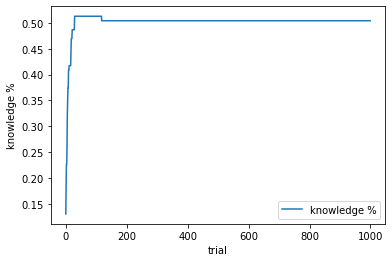

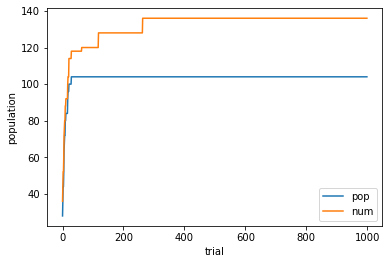

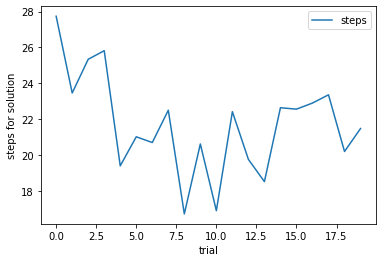

In [5]:
import pandas as pd
import numpy as np

df = pd.DataFrame(metric["knowledge"] for metric in explore_metrics)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("knowledge %")
ax.legend(["knowledge %"])


df = pd.DataFrame(zip([metric["population"] for metric in explore_metrics], [metric["numerosity"] for metric in explore_metrics]))
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("population")
ax.legend(["pop", "num"])

steps_averaged = []



xf = [metric["steps_in_trial"] for metric in explore_metrics]
temp_df = np.array_split(xf, 20)
for i in range(len(temp_df)):
    temp_df[i] = np.mean(temp_df[i]) 
df = pd.DataFrame(temp_df)
print(temp_df)
ax = df.plot()
ax.set_xlabel("trial")
ax.set_ylabel("steps for solution")
ax.legend(["steps"])


In [13]:
# It is hard to say but
# looking at amount of times algorithm reaches top steps (50) the steps might actually go down over trials.
# I need to somehow smooth it to see it better
